<a href="https://colab.research.google.com/github/vorges-data/data_analysis_airbnb_boston/blob/master/Analisando_os_Dados_do_Airbnb_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Análise dos Dados do Airbnb - *Boston*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Boston, e ver quais insights podem ser extraídos a partir de dados brutos.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Obtenção dos Dados


In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ma/boston/2021-12-17/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de visitas
* `license` - documentação do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125,32,21,2021-07-25,0.27,1,17,4,NaN
1,5506,** Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,99,3,110,2021-10-25,0.71,10,75,3,Approved by the government
2,6695,Home Away from Home! Condo,8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,250,3,116,2021-10-12,0.77,10,127,1,STR446650
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Beacon Hill,42.35867,-71.06307,Entire home/apt,80,91,25,2020-04-15,0.28,6,244,0,NaN
4,10730,Bright 1bed facing Golden Dome,26988,Anne,NaN,Downtown,42.35906,-71.06271,Entire home/apt,95,91,32,2020-04-16,0.21,6,314,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
df.dtypes

Entradas: 	 3349
Variáveis: 	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* A variável `license` possui valores nulos em quase metade das linhas.
* A variável `host_name` têm aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
license                           0.447895
reviews_per_month                 0.298298
last_review                       0.298298
host_name                         0.097044
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

**Variáveis numéricas:**

* id
* host_id
* neighbourhood_group
* latitude
* longitude
* price
* minimum_nights
* number_of_reviews
* reviews_per_month
* calculated_host_listings_count
* availability_365
* number_of_reviews_ltm

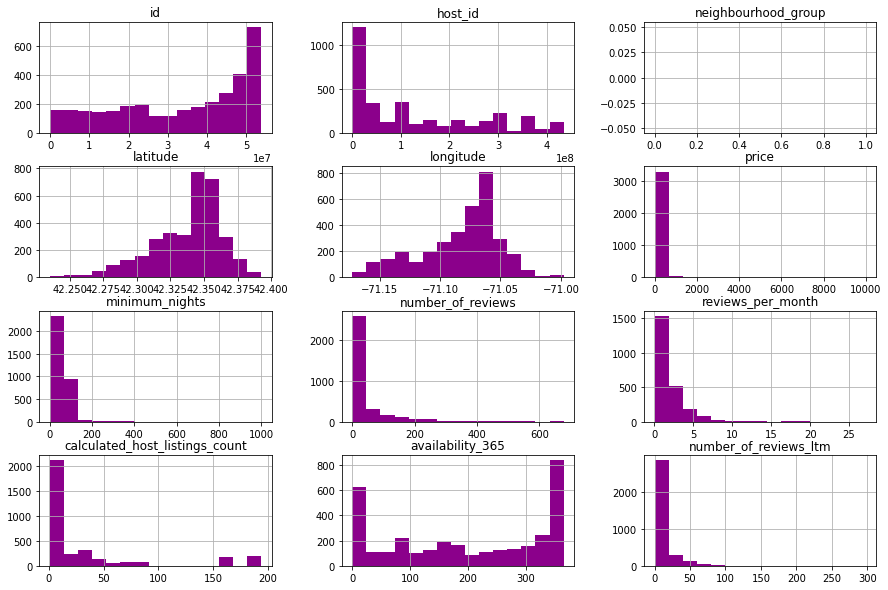

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10),color='darkmagenta');

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df['price'].mean()

168.23111376530306

In [ ]:
# ver resumo estatístico das variáveis numéricas
df[[
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365',
'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3349.000000,3349.000000,3349.000000,2350.000000,3349.000000,3349.000000,3349.000000
mean,168.231114,39.084801,38.313228,1.701140,32.065990,197.484921,8.187220
std,262.049196,46.164722,75.073720,2.068519,55.398099,137.290064,18.424485
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,75.000000,2.000000,0.000000,0.260000,1.000000,70.000000,0.000000
50%,126.000000,29.000000,6.000000,1.000000,6.000000,200.000000,0.000000
75%,200.000000,91.000000,40.000000,2.467500,31.000000,341.000000,7.000000
max,10000.000000,1000.000000,678.000000,27.170000,194.000000,365.000000,298.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 200, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

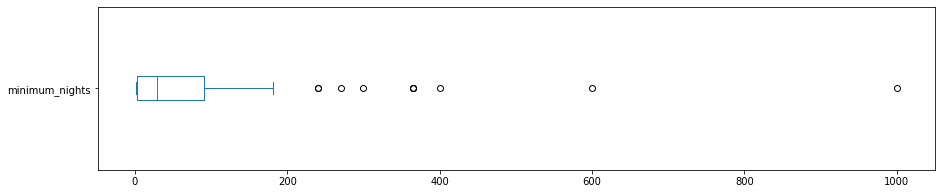

In [ ]:
# minimum_nigths
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()




In [12]:
# ver quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30:')
print('{} entradas'.format(len(df[df['minimum_nights'] > 30])))
print('{:.4f}%'.format((len(df[df['minimum_nights'] > 30]) / df.shape[0])*100))

minimum_nights: valores acima de 30:
1300 entradas
38.8176%


#### Boxplot para Price

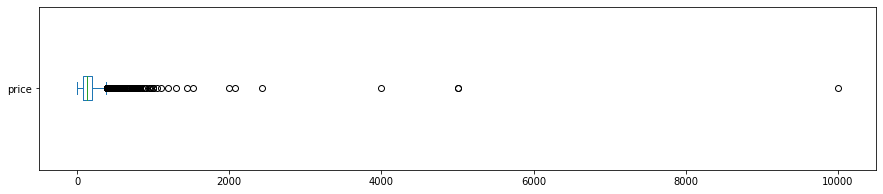


price: valores acima de 1500
8 entradas
0.2389%


In [26]:
# price
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 1500 para price
print('\nprice: valores acima de 1500')
print('{} entradas'.format(len(df[df['price'] > 1500])))
print('{:.4f}%'.format((len(df[df['price'] > 1500]) / df.shape[0]) *100))

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.036340,-0.018191,-0.014662,-0.045039,0.012074
minimum_nights,-0.036340,1.000000,-0.240251,-0.402360,0.160019,0.068076
number_of_reviews,-0.018191,-0.240251,1.000000,0.554802,-0.209252,-0.069758
reviews_per_month,-0.014662,-0.402360,0.554802,1.000000,-0.012628,0.036471
calculated_host_listings_count,-0.045039,0.160019,-0.209252,-0.012628,1.000000,0.329772
availability_365,0.012074,0.068076,-0.069758,0.036471,0.329772,1.000000


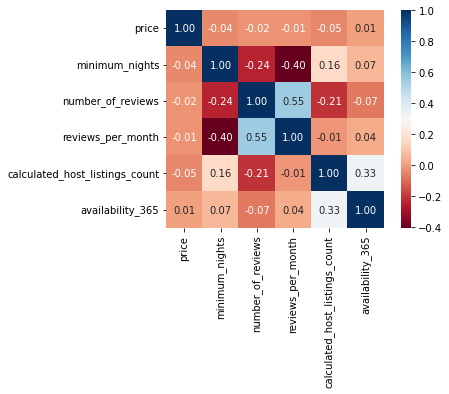

In [28]:
# criar uma matriz de correlação
corr = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
display(corr)

# mostrar a matriz de correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [29]:
# mostrar a quantidade de cada tipo de imóvel disponível
df['room_type'].value_counts()

Entire home/apt    2102
Private room       1210
Hotel room           25
Shared room          12
Name: room_type, dtype: int64

In [30]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df['room_type'].value_counts() / df.shape[0]

Entire home/apt    0.627650
Private room       0.361302
Hotel room         0.007465
Shared room        0.003583
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [33]:
# ver preços por bairros, na média
df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False) [:10]

neighbourhood
Back Bay                   277.309179
South Boston Waterfront    240.000000
Chinatown                  238.804878
Charlestown                238.200000
Downtown                   218.346875
Fenway                     216.619403
South Boston               209.368056
West End                   196.127660
West Roxbury               193.129032
Leather District           184.333333
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

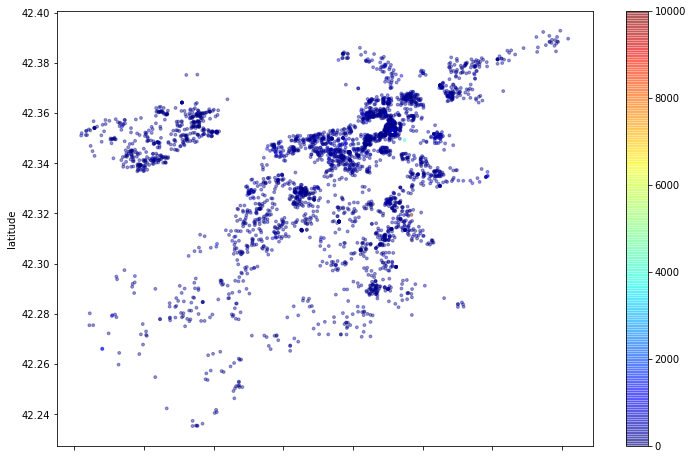

In [34]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.